In [45]:
import tensorflow as tf
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import os

In [46]:
dataset_dir="Quickdraw_dataset"
files=[name for name in os.listdir(dataset_dir) if "npy"in name]
max_size_per_cl=1500
draw_class=[]


In [47]:
size=0
for name in files:
    draws=np.load(os.path.join(dataset_dir,name))
    draws=draws[:max_size_per_cl]
    size+=draws.shape[0]
images=np.zeros((size,28,28))
targets=np.zeros((size,))



it = 0
t = 0
for name in files:
    # Open each dataset and add the new class
    draw_class.append(name.replace("full_numpy_bitmap_", "").replace(".npy", ""))
    draws = np.load(os.path.join(dataset_dir, name))
    draws = draws[:max_size_per_cl] # Take only 10 000 draw
    # Add images to the buffer
    images[it:it+draws.shape[0]] = np.invert(draws.reshape(-1, 28, 28))
    targets[it:it+draws.shape[0]] = t
    # Iter
    it += draws.shape[0]
    t += 1

images = images.astype(np.float32)
    
# Shuffle dataset
indexes = np.arange(size)
np.random.shuffle(indexes)
images = images[indexes]
targets = targets[indexes]

images, images_test, targets, targets_test = train_test_split(images, targets, test_size=0.33)

print("images.shape", images.shape)
print("targets.shape", targets.shape)

images.shape (25125, 28, 28)
targets.shape (25125,)


In [48]:
(draw_class)

['airplane',
 'angel',
 'apple',
 'book',
 'brain',
 'car',
 'chair',
 'dog',
 'eye',
 'face',
 'stop sign',
 't-shirt',
 'television',
 'The Eiffel Tower',
 'The Great Wall of China',
 'The Mona Lisa',
 'toaster',
 'train',
 'tree',
 'truck',
 'violin',
 'wine glass',
 'yoga',
 'zebra',
 'zigzag']

In [49]:
np.unique(draw_class).size

25

In [50]:
import random

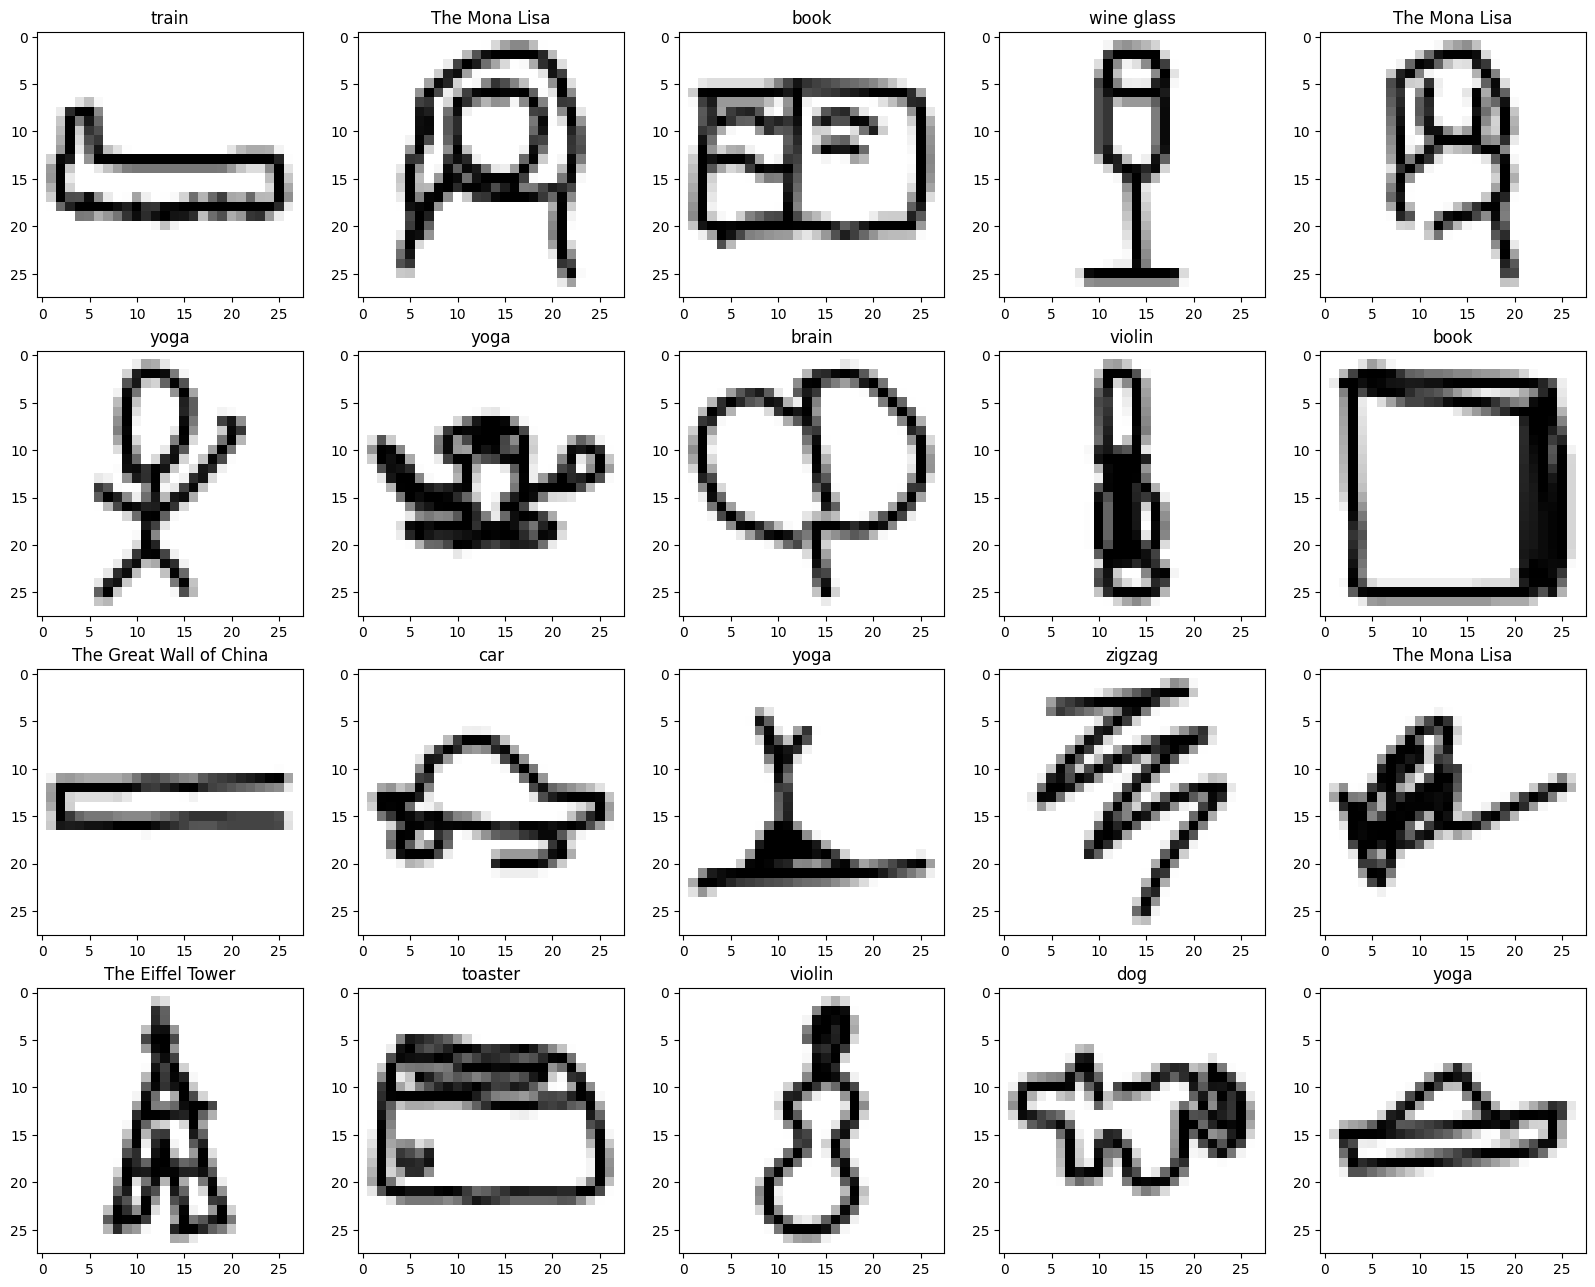

In [51]:

plt.figure(figsize=(20,20))
for i in range(20):
    rand=random.randint(0,images.shape[0])
    plt.subplot(5,5,i+1)
    plt.imshow(images[rand],cmap="gray")
    plt.title(draw_class[(int(targets[rand]))])



In [52]:
images=images/255
images_test=images_test/255



In [53]:
from tensorflow.keras.models import Sequential

In [54]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Activation,Flatten

In [60]:
model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(200,(3,3),input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(150,(3,3),input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


In [61]:
model.add(Flatten())

In [62]:
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dense(np.unique(draw_class).size))
model.add(Activation('softmax'))

In [63]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["sparse_categorical_accuracy"] ,run_eagerly=True)

In [64]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 256)       2560      
                                                                 
 activation_19 (Activation)  (None, 26, 26, 256)       0         
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 13, 13, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 200)       461000    
                                                                 
 activation_20 (Activation)  (None, 11, 11, 200)       0         
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 5, 5, 200)         0         
 ng2D)                                                

In [65]:

history1=model.fit(images[:15000],targets[:15000],batch_size=1000,epochs=120)

Epoch 1/160
15/15 [==============================] - 85s 6s/step - loss: 3.1996 - sparse_categorical_accuracy: 0.0672
Epoch 2/160
15/15 [==============================] - 84s 6s/step - loss: 2.9171 - sparse_categorical_accuracy: 0.1703
Epoch 3/160
15/15 [==============================] - 81s 5s/step - loss: 2.4140 - sparse_categorical_accuracy: 0.3152
Epoch 4/160
15/15 [==============================] - 84s 6s/step - loss: 2.0664 - sparse_categorical_accuracy: 0.4072
Epoch 5/160
15/15 [==============================] - 92s 6s/step - loss: 1.8414 - sparse_categorical_accuracy: 0.4807
Epoch 6/160
15/15 [==============================] - 86s 6s/step - loss: 1.6947 - sparse_categorical_accuracy: 0.5216
Epoch 7/160
15/15 [==============================] - 84s 6s/step - loss: 1.5536 - sparse_categorical_accuracy: 0.5662
Epoch 8/160
15/15 [==============================] - 84s 6s/step - loss: 1.4503 - sparse_categorical_accuracy: 0.5914
Epoch 9/160
15/15 [==============================] - 85s

In [66]:
images_valid=images[15000:]
targets_valid=targets[15000:]
history2=model.fit(images_valid,targets_valid,batch_size=1000,epochs=120)

Epoch 1/160
11/11 [==============================] - 59s 5s/step - loss: 9.2332 - sparse_categorical_accuracy: 0.3719
Epoch 2/160
11/11 [==============================] - 57s 5s/step - loss: 2.5233 - sparse_categorical_accuracy: 0.2907
Epoch 3/160
11/11 [==============================] - 58s 5s/step - loss: 1.7700 - sparse_categorical_accuracy: 0.4995
Epoch 4/160
11/11 [==============================] - 59s 5s/step - loss: 1.2586 - sparse_categorical_accuracy: 0.6476
Epoch 5/160
11/11 [==============================] - 70s 6s/step - loss: 1.0472 - sparse_categorical_accuracy: 0.7052
Epoch 6/160
11/11 [==============================] - 59s 5s/step - loss: 0.8984 - sparse_categorical_accuracy: 0.7471
Epoch 7/160
11/11 [==============================] - 58s 5s/step - loss: 0.7985 - sparse_categorical_accuracy: 0.7727
Epoch 8/160
11/11 [==============================] - 57s 5s/step - loss: 0.7240 - sparse_categorical_accuracy: 0.7959
Epoch 9/160
11/11 [==============================] - 58s

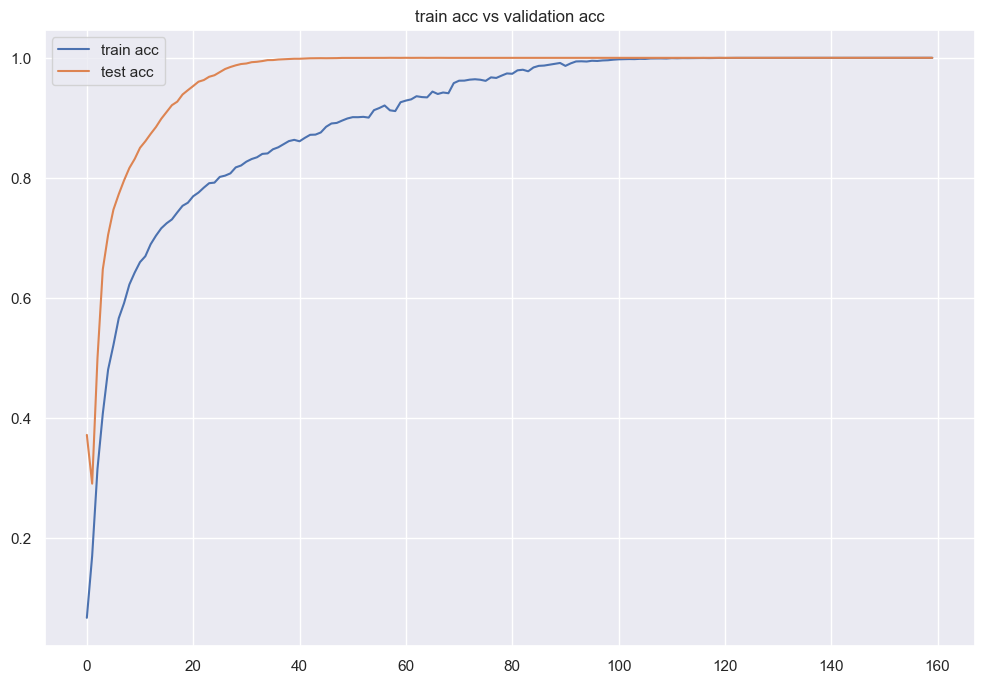

In [67]:
acc = history1.history['sparse_categorical_accuracy']
valid_acc=history2.history['sparse_categorical_accuracy']

loss = history1.history['loss']
valid_loss=history2.history['loss']
epochs = len(acc)
import seaborn as sns
sns.set()
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),valid_acc,label = "test acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

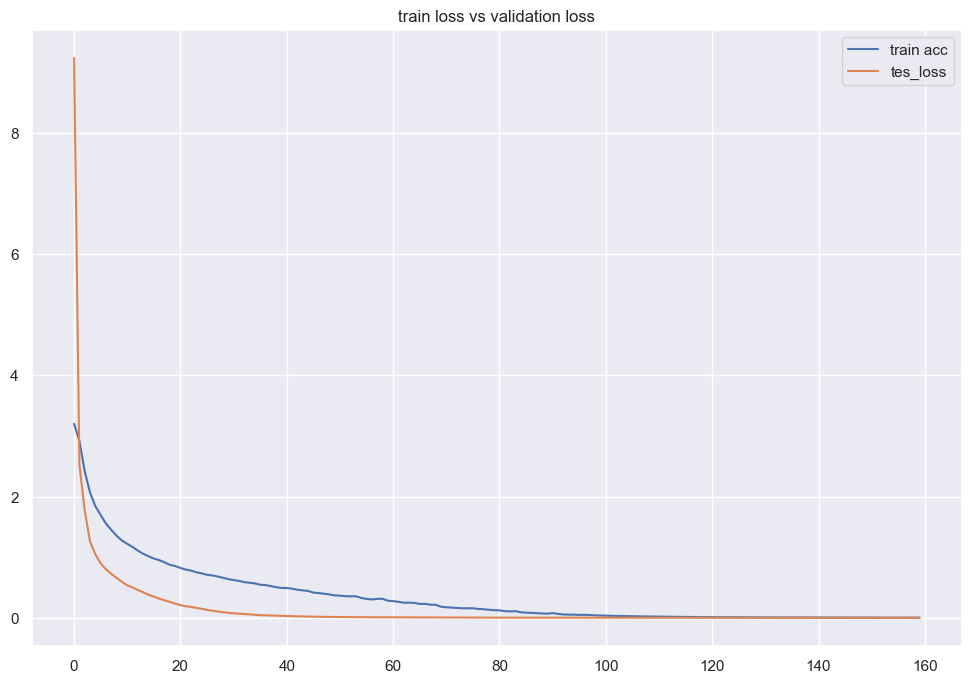

In [68]:
import seaborn as sns
sns.set()
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train acc")
plt.plot(np.arange(epochs),valid_loss,label = "tes_loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

In [70]:
np.argmax(model.predict(images_test[1].reshape(1,28,28,1)))
draw_class[int(targets[1])]


1/1 [==============================] - 0s 84ms/step


't-shirt'

In [73]:
model.evaluate(images_test,targets_test)

387/387 [==============================] - 32s 81ms/step - loss: 2.0207 - sparse_categorical_accuracy: 0.7453


[2.0206503868103027, 0.7452929019927979]

1/1 [==============================] - 0s 74ms/step
Prediction 1 : book
Prediction correcte
1/1 [==============================] - 0s 173ms/step
Prediction 2 : television
Prediction correcte
1/1 [==============================] - 0s 143ms/step
Prediction 3 : wine glass
Prediction correcte
1/1 [==============================] - 0s 63ms/step
Prediction 4 : chair
Prediction correcte
1/1 [==============================] - 0s 252ms/step
Prediction 5 : violin
Prediction correcte
1/1 [==============================] - 0s 164ms/step
Prediction 6 : truck
Prediction incorrecte
1/1 [==============================] - 0s 50ms/step
Prediction 7 : The Great Wall of China
Prediction correcte
1/1 [==============================] - 0s 83ms/step
Prediction 8 : The Eiffel Tower
Prediction correcte
1/1 [==============================] - 0s 55ms/step
Prediction 9 : The Mona Lisa
Prediction correcte
1/1 [==============================] - 0s 38ms/step
Prediction 10 : chair
Prediction correcte
1/1 [===========

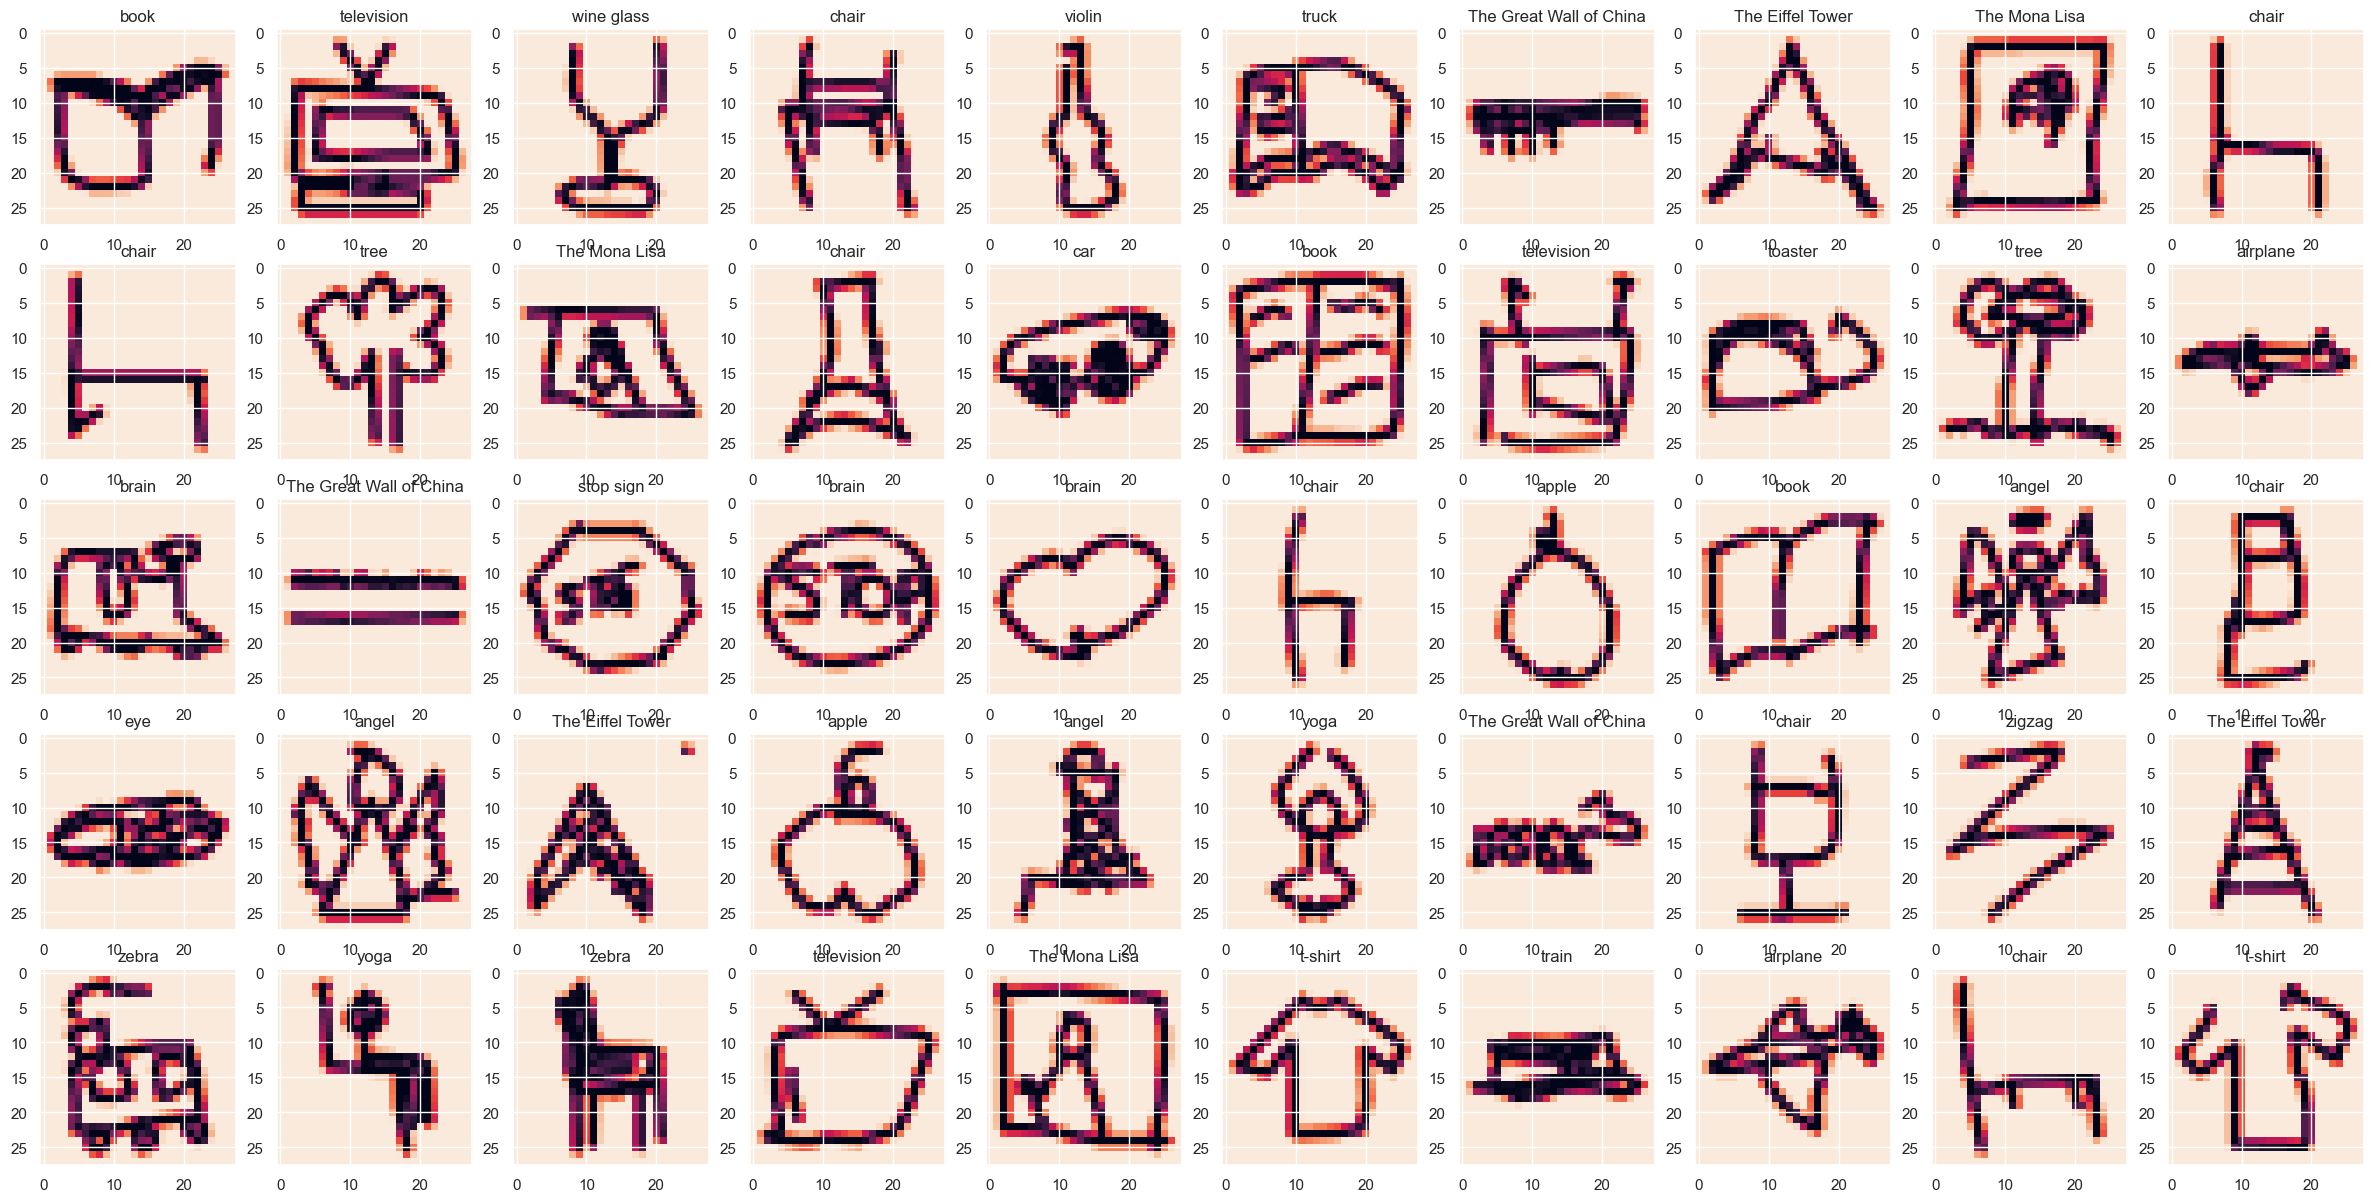

In [74]:
evalution_list=[]
plt.figure(figsize=(30,30))
for k in range(0,50):
    
    plt.subplot(10,10,k+1)
    i=np.argmax(model.predict(images_test[k].reshape(1,28,28,1)))
    y_pred=draw_class[i]
    print('Prediction',k+1,':',y_pred)
    if y_pred==draw_class[int(targets_test[k])]:
        print("Prediction correcte")
        evalution_list.append(1)
    else :
        print("Prediction incorrecte")
        evalution_list.append(0)
    plt.imshow(images_test[k])
    plt.title(draw_class[i])

a=evalution_list.count(1)
print("Sur les tests effectués sur les ",k+1,"premières images du test set, le model a predire:",a," bonnes reponses \n.Soit, ",100*a/(k+1),"% de reussite.")



6303360

fer  upload,fashion,lstm air passenger tokenization nlp,tkinter chat,face recognition,simulation,pygame